<h1><center> NetworkX实例 </center></h1>

NetworkX是基于Python语言的图论与复杂网络工具包，用于创建、操作和研究复杂网络的结构、动力学和功能。

In [1]:
!pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## 1.图的创建

In [3]:
G = nx.Graph()  # 无向图
# G = nx.DiGraph()  # 有向图
# G = nx.MultiGraph()  # 多重无向图
# G = nx.MultiDigraph()  # 多重有向图
# G.clear()  # 清空图

In [4]:
G.is_directed()  # 判断图是否有向

False

## 2.节点相关操作

In [5]:
G.add_node(1)  # 一次添加一个节点
G.add_nodes_from([2, 3])  # 从列表中添加节点
G.nodes

NodeView((1, 2, 3))

In [6]:
G.add_nodes_from([
    (4, {'color': 'red'}),
    (5, {'color': 'green'}),
])  # 添加节点和节点属性
G.nodes

NodeView((1, 2, 3, 4, 5))

In [7]:
G._node  # 查看节点属性

{1: {}, 2: {}, 3: {}, 4: {'color': 'red'}, 5: {'color': 'green'}}

In [8]:
# 删除节点
# G.remove_node(node_ID)
# G.remove_nodes_from(nodes_list)

In [9]:
G.has_node(1)  # 查看是否存在某个节点

True

## 3.边相关操作

In [10]:
G.add_edge(1, 2)

e = (2, 3)
G.add_edge(*e)

In [11]:
G.add_edges_from([(1, 2), (1, 3)])  # 添加边列表
G.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

In [12]:
G.add_edges_from([(4, 5, {'weight': 3.1415}), (1, 4, {'weight': 10})])  # 添加边的属性
G.edges

EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (4, 5)])

In [13]:
G.edges(data=True)   # 查看边的属性

EdgeDataView([(1, 2, {}), (1, 3, {}), (1, 4, {'weight': 10}), (2, 3, {}), (4, 5, {'weight': 3.1415})])

In [14]:
# 删除边
# G.remove_edge(edge_ID)
# G.remove_edges_from(edges_list)

In [15]:
G.has_edge(1, 2)  # 查看是否存在某条边

True

## 4.图基本信息的获取

In [16]:
G.number_of_nodes()  # 输出图的节点数

5

In [17]:
G.number_of_edges()  # 输出图的边数

5

In [18]:
G.adj[1]  # 输出节点1的邻居

AtlasView({2: {}, 3: {}, 4: {'weight': 10}})

In [19]:
G.degree  # 输出节点的度

DegreeView({1: 3, 2: 2, 3: 2, 4: 2, 5: 1})

In [20]:
G.degree[1]  # 输出节点1的度

3

In [21]:
nx.degree_histogram(G)  # 返回图中度的分布

[0, 1, 3, 1]

In [22]:
nx.pagerank(G)  # 返回图中各顶点的频率分布

{1: 0.34478876232934264,
 2: 0.09464775085286475,
 3: 0.09464775085286475,
 4: 0.3622984250583127,
 5: 0.1036173109066155}

In [23]:
nx.has_path(G, 1, 2)  # 判断两个节点间是否存在路径

True

## 5.图的绘制

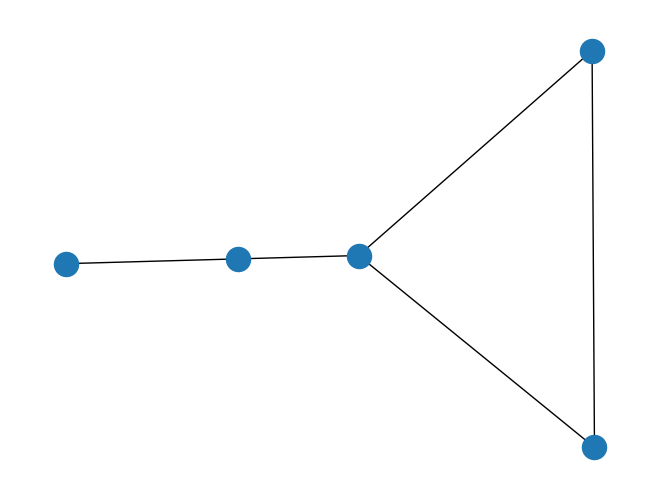

In [24]:
nx.draw(G)

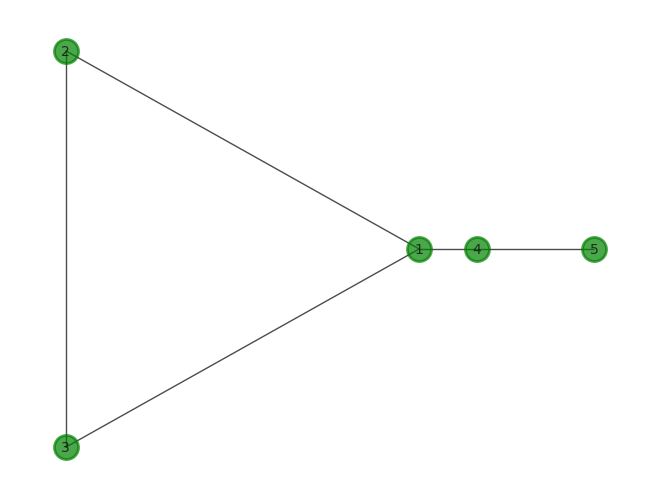

In [25]:
# 设置其他相关参数
nx.draw(G,
    with_labels=True,
    pos=nx.spectral_layout(G),
    node_color='green',
    edge_color='k',
    node_size=300,
    node_shape='o',
    linewidths=2,
    width=1.0,
    alpha=0.7,
    style='solid',
    font_size=10,
    font_color='k'
)

## 6.图的分析

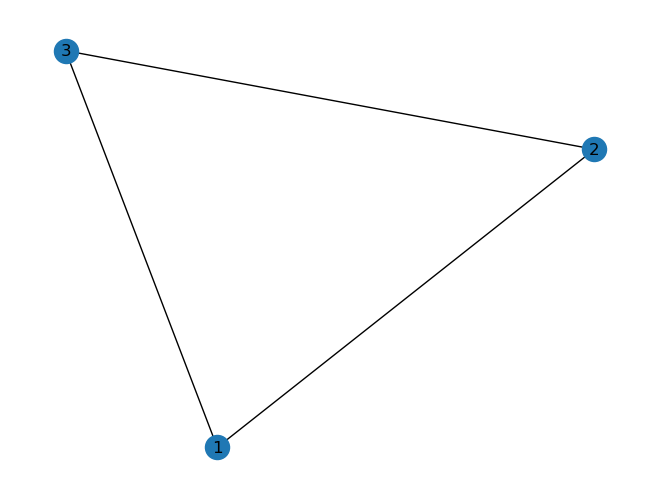

In [26]:
subG = nx.subgraph(G, [1, 2, 3])  # 根据节点列表获取子图
nx.draw(subG, with_labels=True)

In [27]:
list(nx.connected_components(G))  # 返回连通子图的集合

[{1, 2, 3, 4, 5}]

In [28]:
nx.shortest_path(G, 2, 4, method='dijkstra')  # 获取两个节点间的最短路径列表

[2, 1, 4]

In [29]:
nx.average_shortest_path_length(G, weight=None)  # 获取图中平均最短路径长度

1.7

In [30]:
nx.clustering(G)  # 节点的聚类系数

{1: 0.3333333333333333, 2: 1.0, 3: 1.0, 4: 0, 5: 0}

In [31]:
# 节点中心度Centrality Measures
nx.degree_centrality(G)  # 度中心性

{1: 0.75, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.25}

In [32]:
# 节点中心度Centrality Measures
nx.betweenness_centrality(G)  # 介数中心性

{1: 0.6666666666666666, 2: 0.0, 3: 0.0, 4: 0.5, 5: 0.0}

In [33]:
# 节点中心度Centrality Measures
nx.closeness_centrality(G)  # 接近度中心性

{1: 0.8,
 2: 0.5714285714285714,
 3: 0.5714285714285714,
 4: 0.6666666666666666,
 5: 0.4444444444444444}

## 7.社交网络分析案例

数据来源：http://snap.stanford.edu/data/ego-Facebook.html

In [34]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [35]:
# 加载连边数据，每条边都是一个新行，每条边都有一个start_node和一个end_node列
facebook = pd.read_csv(
    "facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

In [36]:
# 创建网络
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

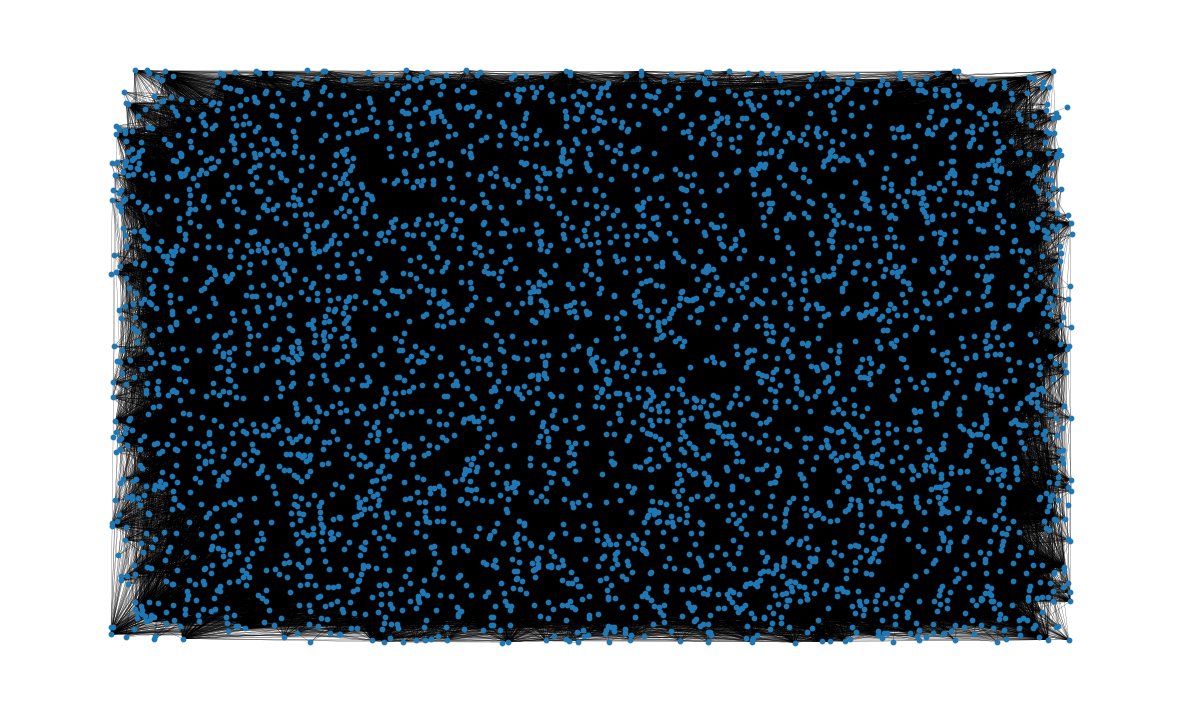

In [37]:
# 可视化网络
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

使用random_layout生成的图因重叠的边导致较为混乱，难以观察。

因此，选择使用spring_layout在定位上施加更多的结构，优点是考虑边和节点来计算节点的位置，缺点是计算成本较高。

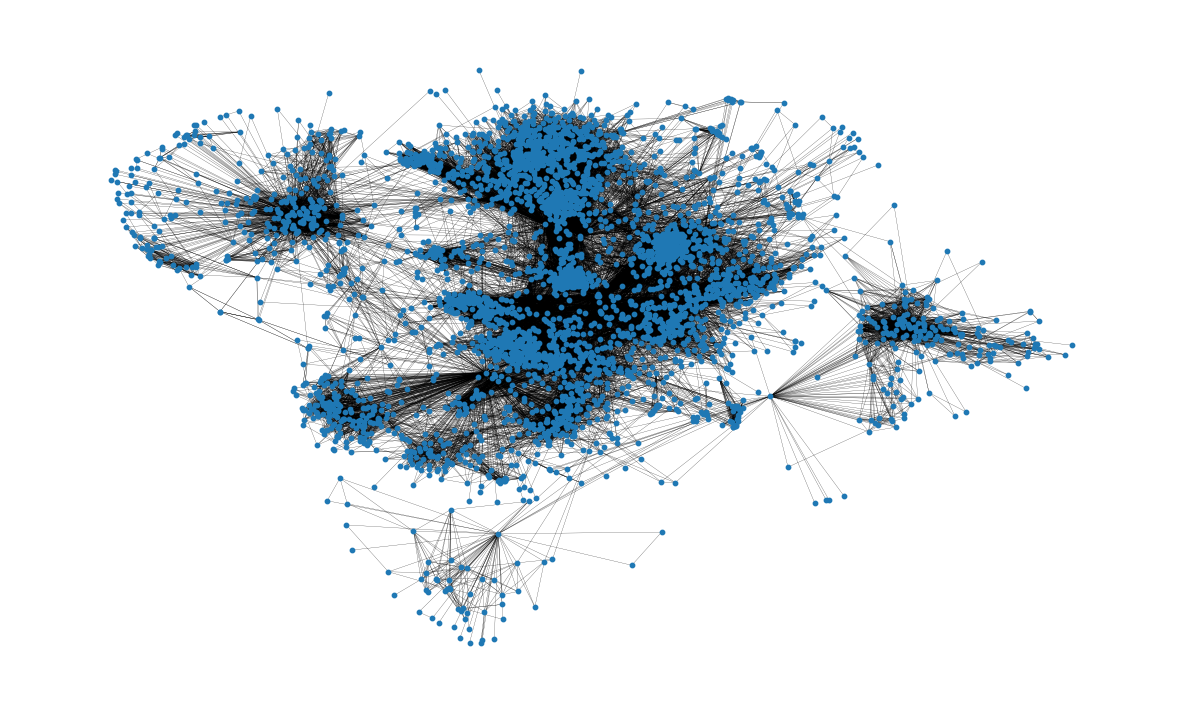

In [38]:
# 由于数据集有超过80k条边，我们将限制spring_layout函数中使用的迭代次数，以减少计算时间
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [39]:
# 节点数量
G.number_of_nodes()

4039

In [40]:
# 边数量
G.number_of_edges()

88234

In [41]:
# 节点度数平均值
np.mean([d for _, d in G.degree()])

43.69101262688784

In [42]:
# 最短路径长度
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
# 输出节点0到其余节点的最短路径长度
print(shortest_path_lengths[0])

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 

In [43]:
# 节点0和42间的最短路径长度
shortest_path_lengths[0][42]

1

In [44]:
# 离心中心度Eccentricity：节点与网络中的所有节点的最短距离的最大值
# 网络直径
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [45]:
# 所有节点的平均最短路径长度
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
np.mean(average_path_lengths)

3.691592636562027

所有节点的平均最短路径长度含义：从一个节点到达另一个节点，平均大约要遍历3.6条边。

Text(0, 0.5, 'Frequency (%)')

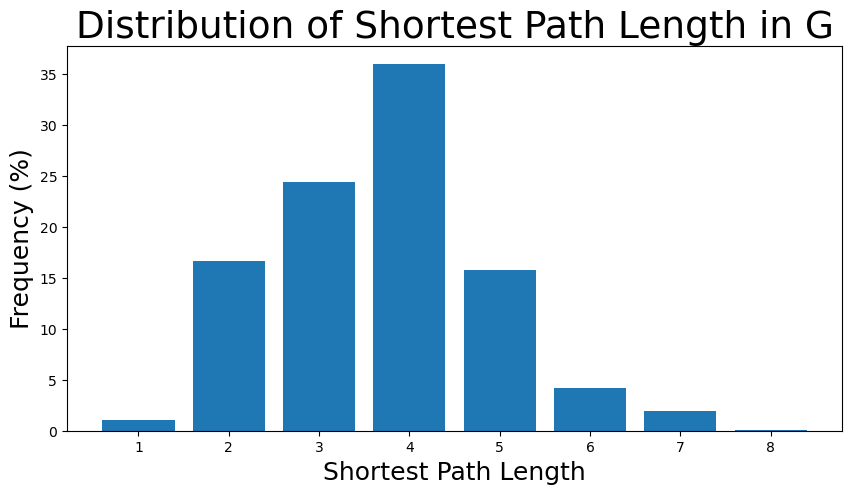

In [46]:
path_lengths = np.zeros(diameter + 1, dtype=int)

# 提取两个节点间最短路径的长度出现的频率
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# 将频率分布表示为百分比
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# 绘制频率分布图
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of Shortest Path Length in G", fontdict={"size": 27}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 18})
ax.set_ylabel("Frequency (%)", fontdict={"size": 18})

大多数最短路径的长度是2-5。此外，对于一对节点来说，其最短路径长度为8(直径长度)的可能性非常小，小于0.1%。

In [47]:
# 计算图的密度
nx.density(G)

0.010819963503439287

可以看出，图较为稀疏。

In [48]:
# 图包含连通子图的数目
nx.number_connected_components(G)

1

In [49]:
# 输出度中心性最高的8个节点及其度中心性值
degree_centrality = nx.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]

In [50]:
# 输出度中心性最高的8个节点及其邻居数量
(sorted(G.degree, key=lambda item: item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Counts')

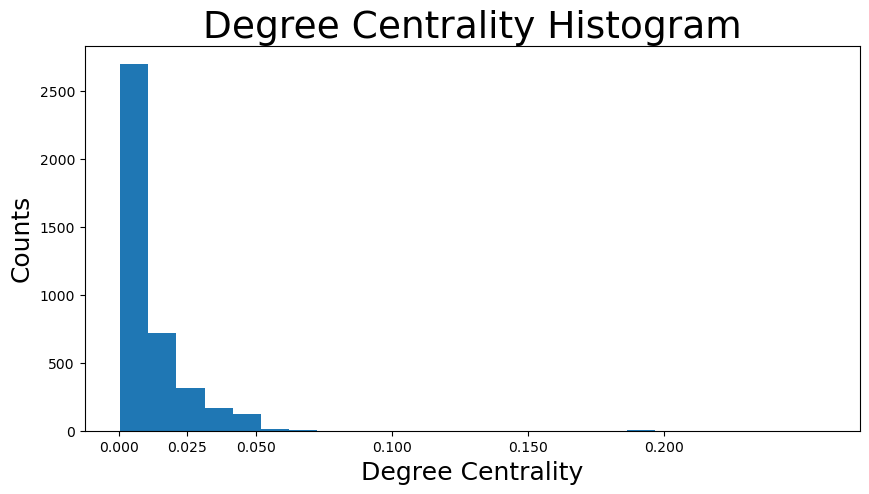

In [51]:
# 绘制度中心性分布图
plt.figure(figsize=(10, 5))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])
plt.title("Degree Centrality Histogram", fontdict={"size": 27}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 18})
plt.ylabel("Counts", fontdict={"size": 18})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

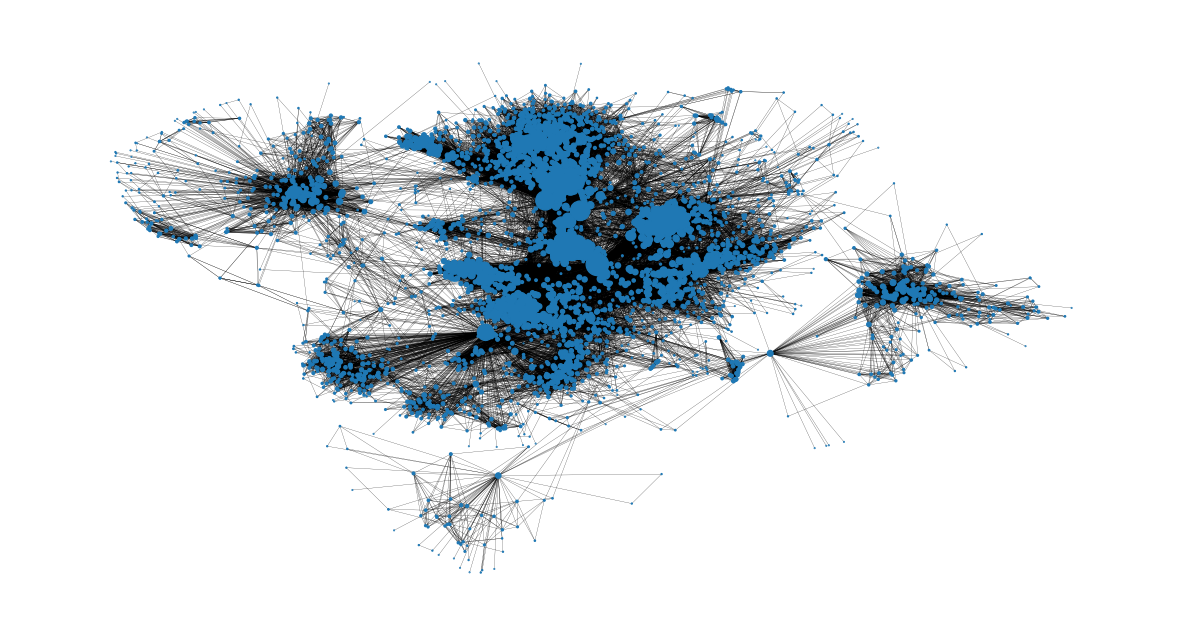

In [52]:
# 利用节点大小表示度中心性进行网络可视化
node_size = [
    v * 1000 for v in degree_centrality.values()
]
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [53]:
# 输出介数中心性最高的8个节点及其介数中心性值
betweenness_centrality = nx.betweenness_centrality(G)
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215)]

Text(0, 0.5, 'Counts')

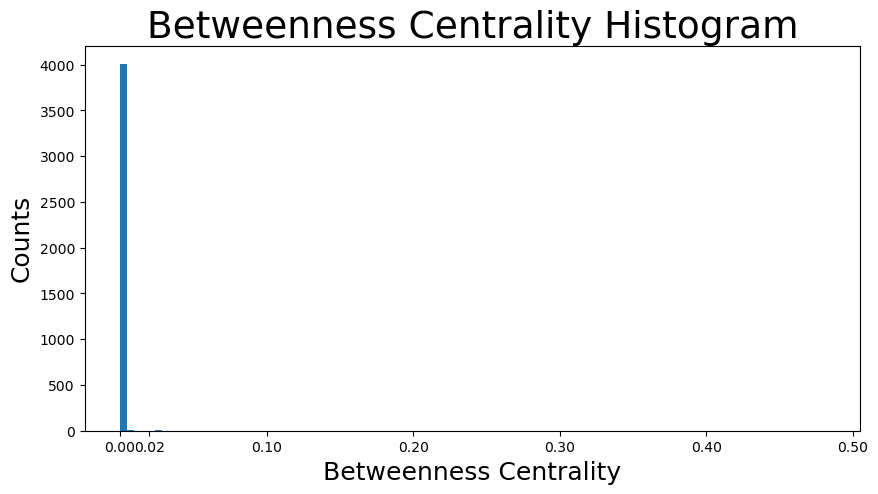

In [54]:
# 绘制介数中心性分布图
plt.figure(figsize=(10, 5))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.title("Betweenness Centrality Histogram", fontdict={"size": 27}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 18})
plt.ylabel("Counts", fontdict={"size": 18})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

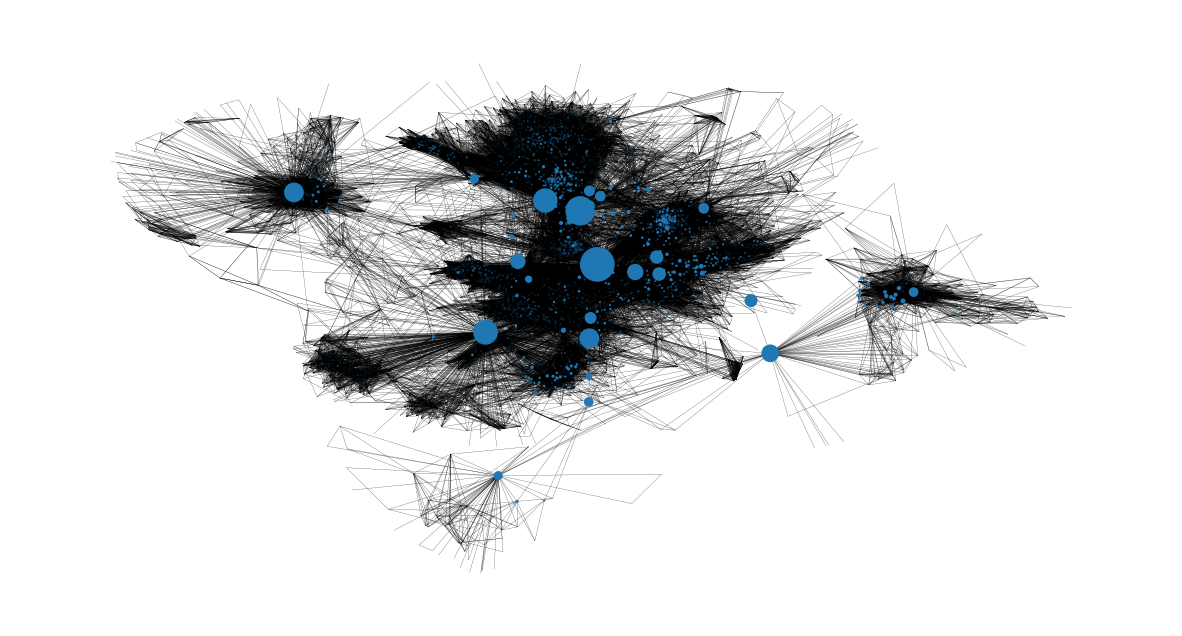

In [55]:
# 利用节点大小表示介数中心性进行网络可视化
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [56]:
# 输出接近度中心性最高的8个节点及其度中心性值
closeness_centrality = nx.centrality.closeness_centrality(G)
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739)]

Text(0, 0.5, 'Counts')

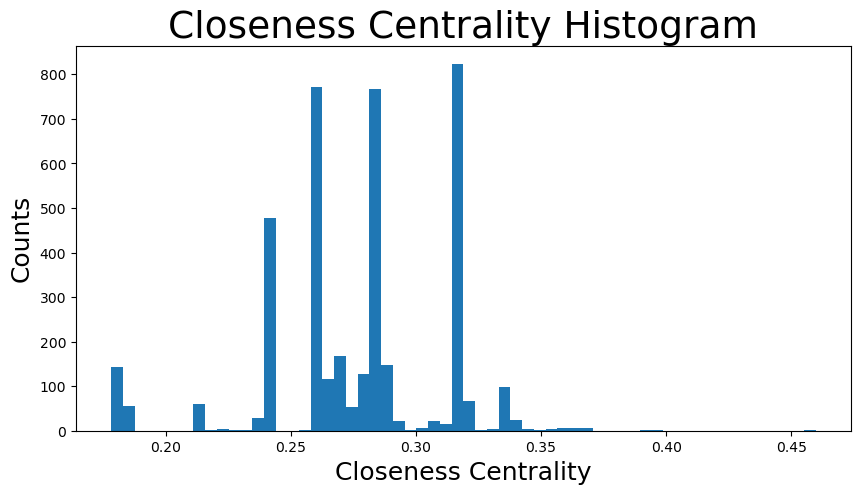

In [57]:
# 绘制接近度中心性分布图
plt.figure(figsize=(10, 5))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram", fontdict={"size": 27}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 18})
plt.ylabel("Counts", fontdict={"size": 18})

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

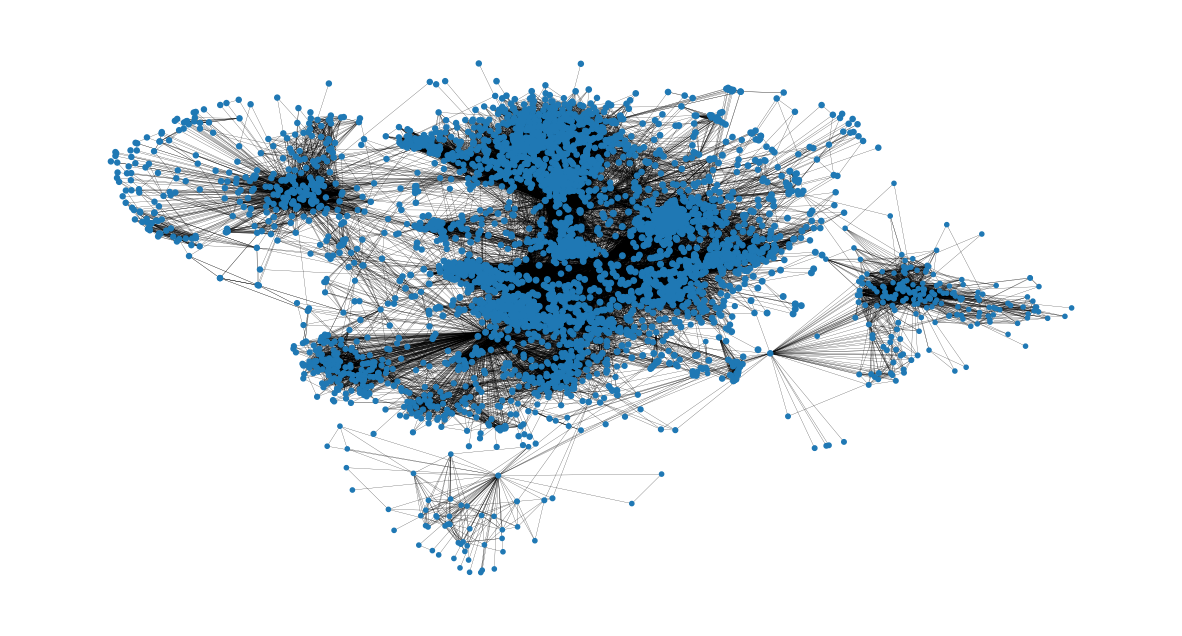

In [58]:
# 利用节点大小表示接近度中心性进行网络可视化
node_size = [
    v * 50 for v in closeness_centrality.values()
]
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

In [59]:
# 平均聚类系数
nx.average_clustering(G)

0.6055467186200876

Text(0, 0.5, 'Counts')

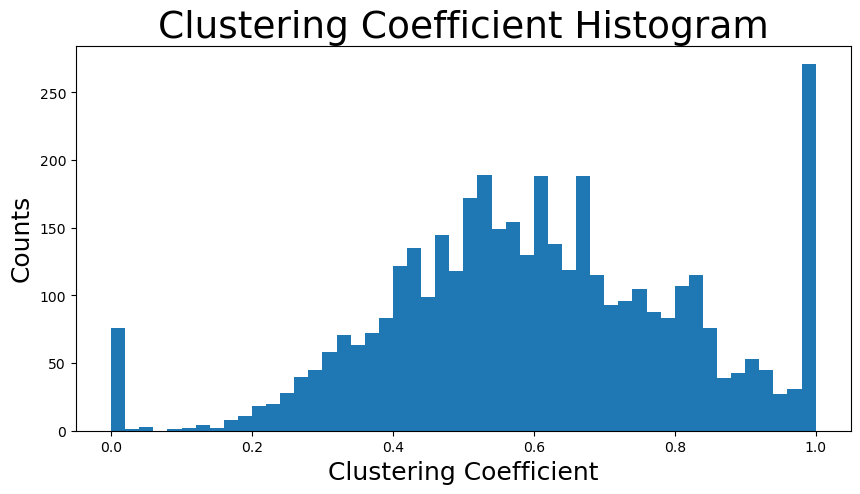

In [60]:
# 绘制聚类系数分布图
plt.figure(figsize=(10, 5))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram", fontdict={"size": 27}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 18})
plt.ylabel("Counts", fontdict={"size": 18})

In [61]:
# 桥
nx.has_bridges(G)

True

In [62]:
# 输出桥的数量
bridges = list(nx.bridges(G))
len(bridges)

75

(-0.9991880235075951,
 1.1078363832831382,
 -1.164599134027958,
 0.7322099342942238)

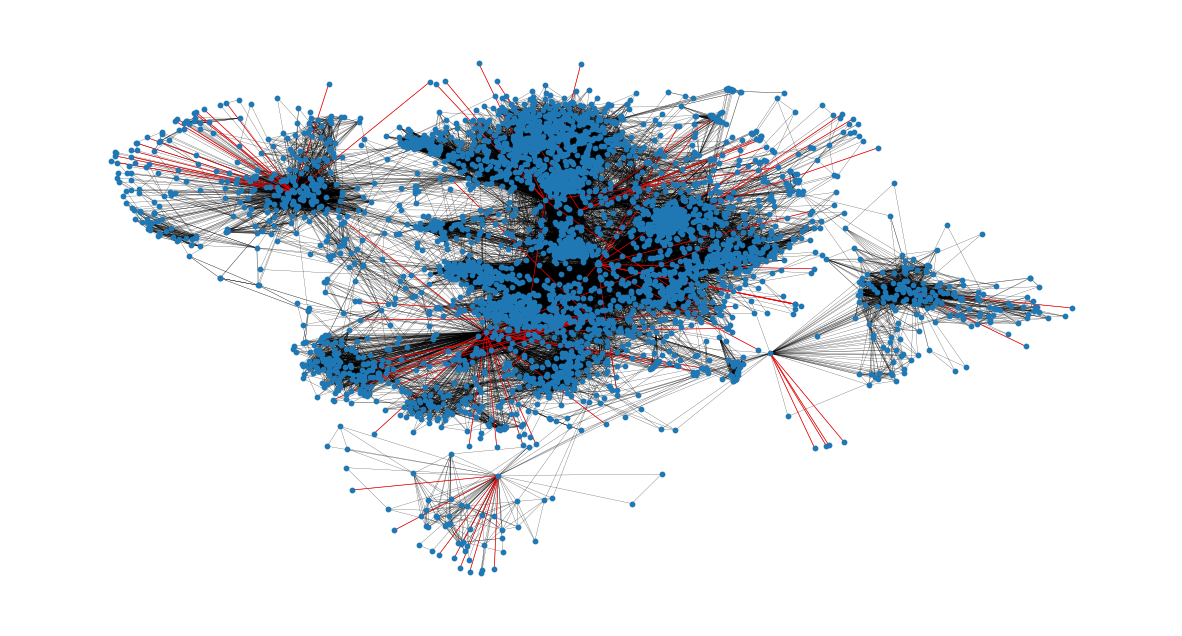

In [63]:
# 桥可视化
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(G, pos, edgelist=bridges, width=0.5, edge_color="r")
plt.axis("off")

In [64]:
# 度数同配系数
nx.degree_assortativity_coefficient(G)

0.06357722918564943

In [65]:
# 度数关联系数
nx.degree_pearson_correlation_coefficient(G)

0.06357722918564918

网络社区：社区是一组节点，组内节点连接的边要比组间节点连接的边多得多。

In [66]:
# 采用半同步标签传播算法检测社区
colors = ["" for x in range(G.number_of_nodes())]
counter = 0
for com in nx.community.label_propagation_communities(G):
    color = "#%06X" % randint(0, 0xFFFFFF)  # create random RGB color
    counter += 1
    for node in list(com):
        colors[node] = color
counter

44

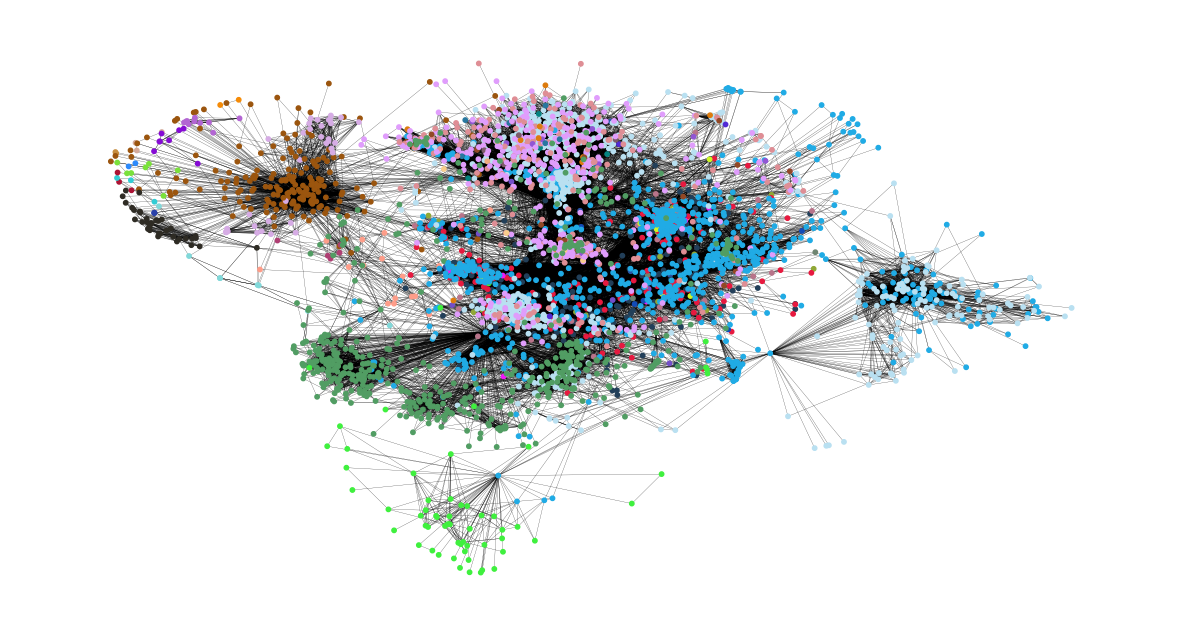

In [67]:
# 社区可视化
plt.figure(figsize=(15, 8))
plt.axis("off")
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)

In [68]:
# 采用异步流体团体算法检测社区，规定社区数量为8
colors = ["" for x in range(G.number_of_nodes())]
for com in nx.community.asyn_fluidc(G, 8, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # create random RGB color
    for node in list(com):
        colors[node] = color

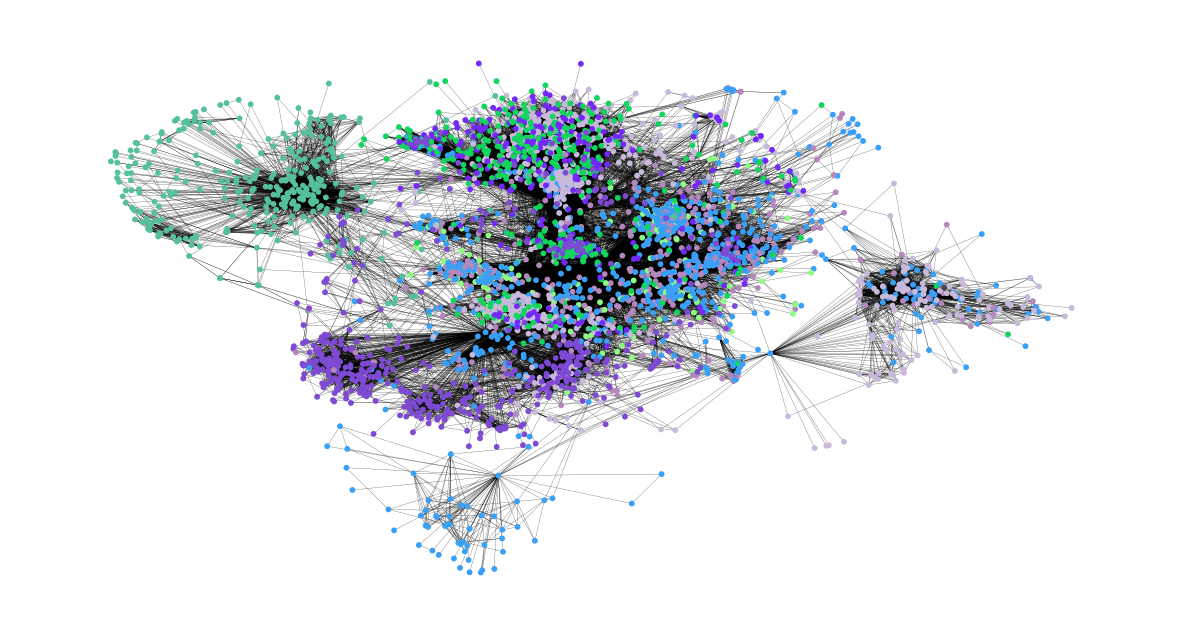

In [69]:
# 社区可视化
plt.figure(figsize=(15, 8))
plt.axis("off")
nx.draw_networkx(G, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors)